# K-Nearest Neighbors

Importing our packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

%matplotlib inline

Loading our data:

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
# df.head(2)
print('Data loaded!')

Data loaded!


## Our Dataset

The features of this dataset represents customers of a telecommunication provider. This provider has segmented its customers into groups based on their service usage patterns, <code>custcat</code>. 

<code>custcat</code> has four possible categories:
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

If we can build a model to predict group membership, the provider can customizee offers for individual prospective customers.

## Analysis

Let's see the distribution among our possible labels:

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [4]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


## Defining Feature Set
In order to use scikit-learn, we must convert our dataframes into Numpy arrays:

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
# feature set
x = df[['region', 'tenure', 'age', 'marital','address', 'income',
        'ed', 'employ', 'retire', 'gender', 'reside']].values
x [0:2]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.]])

In [7]:
# label set
y = df['custcat'].values
y[0:2]

array([1, 4])

## Normalizing Data
Data standardizaion gives the data zero mean and unit variance.</br>
Good practice, especialy for KNN which is based on the distance of data points.

In [8]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

## Train/Test Split
We will be using an 80/20 training and testing split, respectively.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=4)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classification: K-Nearest Neighbor (KNN)
#### Training

In [10]:
k = 4
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=4)

#### Predicting

In [11]:
yhat = knn.predict(x_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

#### Evaluation
In multilabel classification, accuracy classification score is a function that computes subset accuracy, like Jaccard Score.

In [12]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


### Let's try again, this time with K=6
Training:

In [13]:
k = 6
knn = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=6)

Predicting:

In [14]:
yhat = knn.predict(x_test)
yhat[0:5]

array([3, 3, 3, 4, 4])

Evaluation:

In [15]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


### How do we choose the best <code>k</code> value?
Iteratively build and evaluate models using k=1 and each subsquent K value in order to see which value for K gives us the most accurate model.

##### Calculating the accuracy of KNN for different values of k:

In [16]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=knn.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

##### Plotting the accuracy of our models:

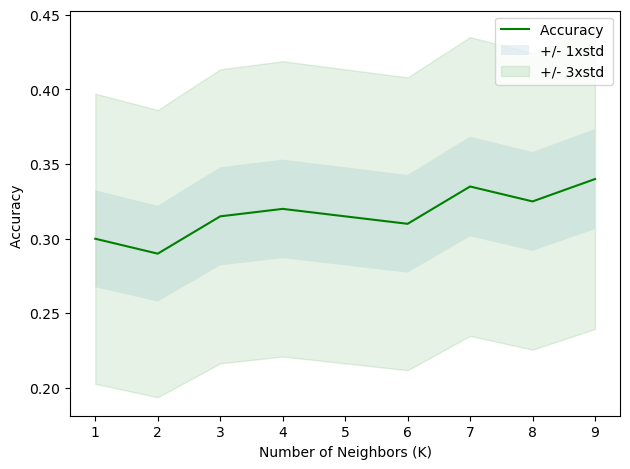

In [17]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#### Inference:

In [18]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
